In [13]:
import xarray as xr
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
# open dataset
f = xr.open_dataset('seNorge2018_RR_1957_2017.nc')

In [16]:
# f['time'][:]
# f.summary
f['rr'] # - units: kg/m2 -> precipitation data 

In [45]:
# round dates to 'day'
f_days = f.assign(date = lambda f: f.time.dt.round('D')) 
# add weekday
f_days_of_week = f_days.assign(day_of_week = lambda f: f_days.date.dt.weekday) 

In [46]:
# whats it looks like: 
f_days_of_week['day_of_week']

<xarray.DataArray 'day_of_week' (time: 22280)>
array([1, 2, 3, ..., 4, 5, 6])
Coordinates:
  * time     (time) datetime64[ns] 1957-01-01T06:00:00 ... 2017-12-31T06:00:00

In [ ]:
# the entire dataset
# groups:
# a = f_days_of_week.groupby("day_of_week").groups

# group by day of week
# xmean = f_days_of_week.groupby('day_of_week').mean()

In [ ]:
# what xmean looks like
# xmean

### Subsets of the dataset: 1 year

In [47]:
## ----- take subsets:

# take only 1 year:
rain2016 = f_days_of_week.sel(time=slice("2016-01-01", "2016-12-31"))
# group by day of week
mean2016 = rain2016.groupby('day_of_week').mean()
sum2016 = rain2016.groupby('day_of_week').sum()

/opt/anaconda3/envs/rain/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [48]:
mean2016_rain = mean2016['rr']#.plot()
sum2016_rain = sum2016['rr']#.plot()
# mean2016_rain.plot()

In [ ]:
# what separate days look like:
day0 = mean2016_rain.isel(day_of_week=0)
day1 = mean2016_rain.isel(day_of_week=1)
day2 = mean2016_rain.isel(day_of_week=2)
day3 = mean2016_rain.isel(day_of_week=3)
day4 = mean2016_rain.isel(day_of_week=4)
day5 = mean2016_rain.isel(day_of_week=5)
day6 = mean2016_rain.isel(day_of_week=6)

# day0.plot(vmin=0, vmax=20)
# day1.plot(vmin=0, vmax=20)
# day2.plot(vmin=0, vmax=20)
# day3.plot(vmin=0, vmax=20)
# day4.plot(vmin=0, vmax=20)
# day5.plot(vmin=0, vmax=20)
# day6.plot(vmin=0, vmax=20)

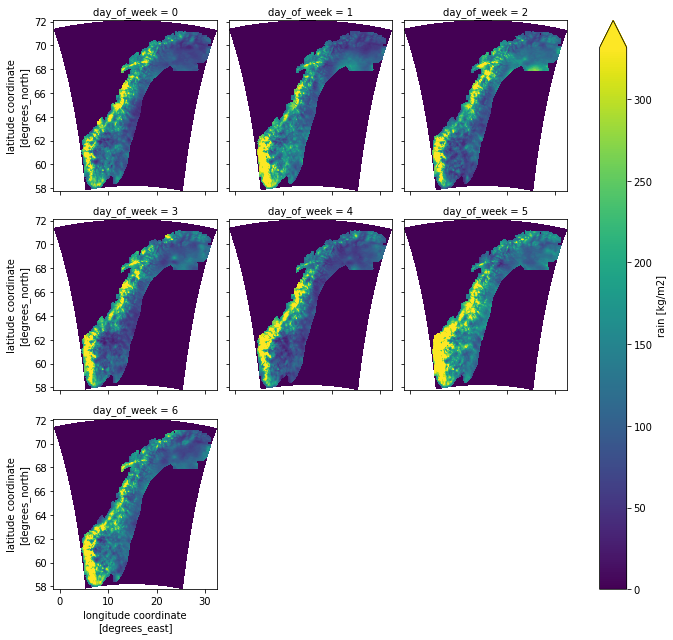

In [49]:
## rain 2016 days of week - total precipitation:

sum2016_rain.plot.pcolormesh(
    "lon",
    "lat",
    col="day_of_week",
    col_wrap=3,
    robust=True,
    cmap="viridis",
    cbar_kwargs={"label": "rain [kg/m2]"},
)

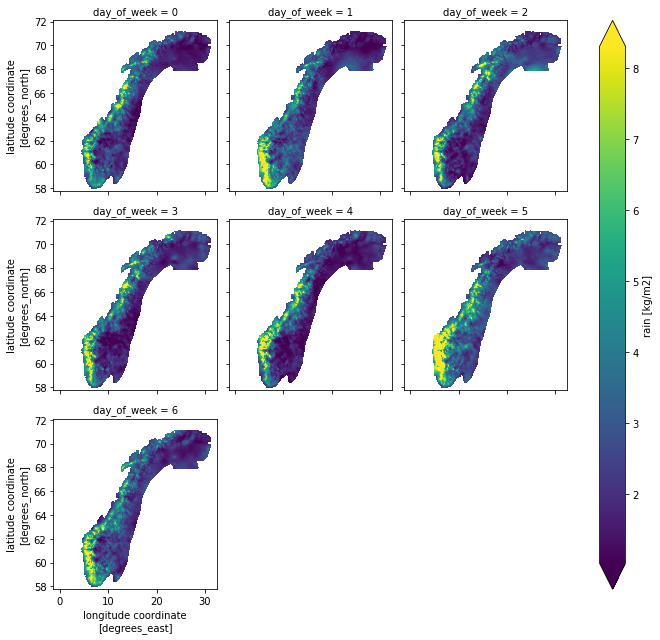

In [50]:
# rain in 2016 - mean precipitation 

mean2016_rain.plot.pcolormesh(
    "lon",
    "lat",
    col="day_of_week",
    col_wrap=3,
    robust=True,
    cmap="viridis",
    cbar_kwargs={"label": "rain [kg/m2]"},
)

### Subset: only summer 2016

In [51]:
## ----- take subsets:

# april to october
summer2016 = f_days_of_week.sel(time=slice("2016-04-01", "2016-10-31"))
# group by day of week
summer_mean2016 = summer2016.groupby('day_of_week').mean()
summer_sum2016 = summer2016.groupby('day_of_week').sum()

/opt/anaconda3/envs/rain/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [52]:
summer_mean2016_rain = summer_mean2016['rr']
summer_sum2016_rain = summer_sum2016['rr']

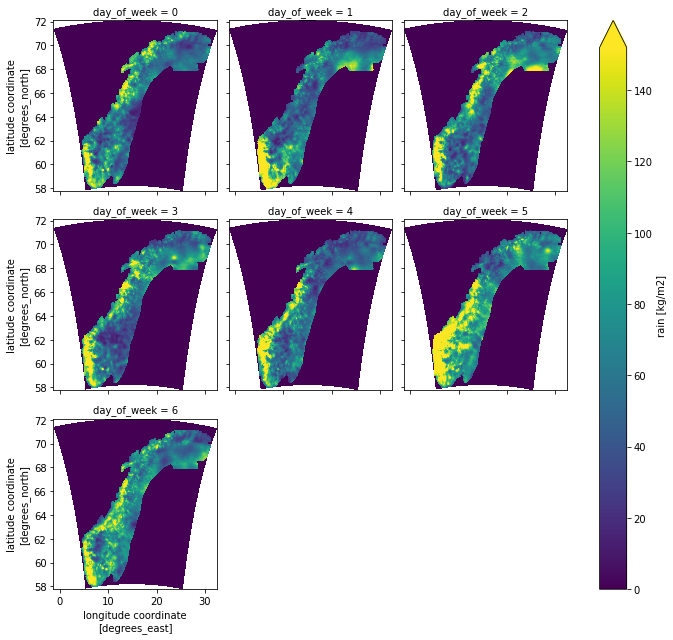

In [54]:
# rain in 2016 - mean precipitation 

summer_sum2016_rain.plot.pcolormesh(
    "lon",
    "lat",
    col="day_of_week",
    col_wrap=3,
    robust=True,
    cmap="viridis",
    cbar_kwargs={"label": "rain [kg/m2]"},
)

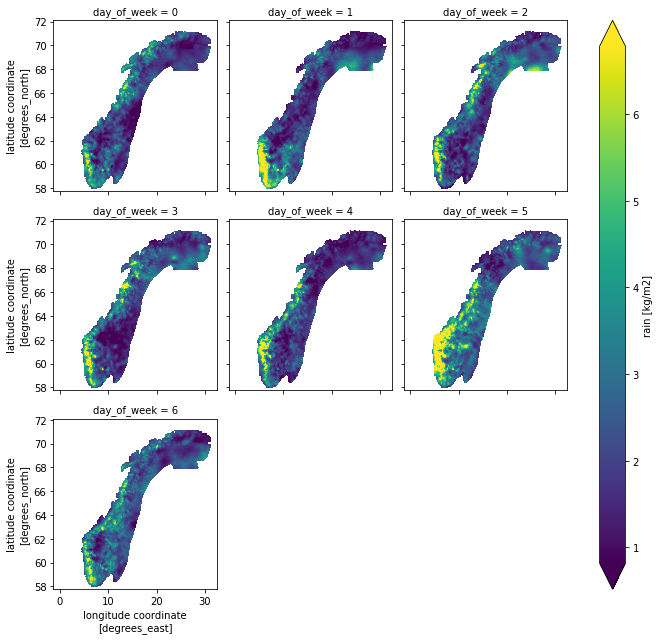

In [55]:
# rain in 2016 - mean precipitation 

summer_mean2016_rain.plot.pcolormesh(
    "lon",
    "lat",
    col="day_of_week",
    col_wrap=3,
    robust=True,
    cmap="viridis",
    cbar_kwargs={"label": "rain [kg/m2]"},
)

### Subset of the datacube: summers for multiple years

In [22]:
## add month parameter to the data 

f_days_of_week_month = f_days_of_week.assign(month = lambda f: f_days.date.dt.weekday) 

In [31]:
## take only summer for multiple years

def summer(month):
    return (month >= 4) & (month <= 10)

summer_rain = f_days_of_week_month.sel(time=summer(f_days_of_week_month['time.month']))

In [39]:
## take year subset:

summer_rain_slice = summer_rain.sel(time=slice("2010-01-01", "2018-12-31"))
summer_mean_slice = summer_rain_slice.groupby('day_of_week').mean()


In [42]:
summer_mean_slice = summer_mean_slice['rr']

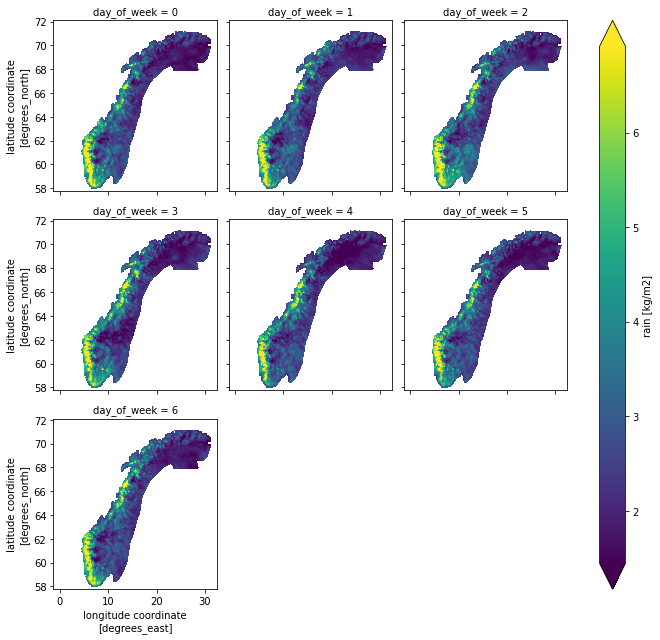

In [43]:
# rain summer - mean values

r = summer_mean_slice.plot.pcolormesh(
    "lon",
    "lat",
    col="day_of_week",
    col_wrap=3,
    robust=True,
    cmap="viridis",
    cbar_kwargs={"label": "rain [kg/m2]"},
)

In [56]:
## try different periods (14 years before 2000 and before 1970s)